# Example 6: Temporal Resolution Demonstration and Benchmark
Model simulations depend on the temporal resolution used. A model with monthly time steps of tracer input behaves differently than a model with yearly time steps. Here we demonstrate the differences and benchmark the use of the time step size parameter for the model (`dt`) to convert units.

In [1]:
import PyTracerLab.model as ism
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## 1. Load (Synthetic) Observation Data
See Example 4 on how this data is generated.

In [10]:
# load input series on monthly time steps
# this would be the tracer concentration in precipitation or recharge in a
# practical problem
file_name = "benchmark_input_monthly.csv"
data_m = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float],
    encoding="utf-8",
    skip_header=1
)

timestamps_m = np.array([datetime.strptime(row[0], r"%Y-%m") for row in data_m])
input_series_m = np.array([float(row[1]) for row in data_m])

# load input series on monthly time steps
# this would be the tracer concentration in precipitation or recharge in a
# practical problem
file_name = "benchmark_input_yearly.csv"
data_y = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float],
    encoding="utf-8",
    skip_header=1
)

timestamps_y = np.array([datetime.strptime(row[0], r"%Y") for row in data_y])
input_series_y = np.array([float(row[1]) for row in data_y])
# the monthly series has months as time units; we have to divide the yearly
# values by 12 to get the monthly values
input_series_y /= 12.

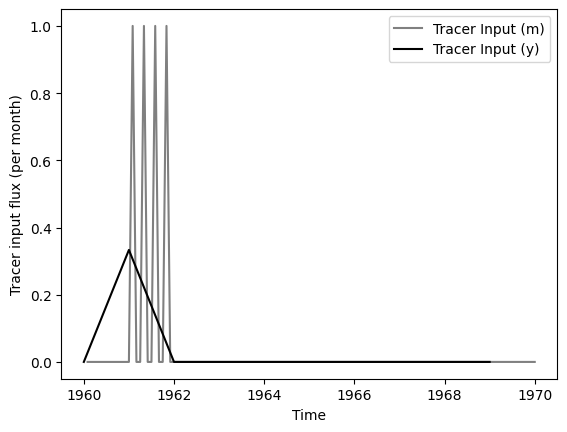

In [20]:
### plot input series, output series, and observations

# get observation timesteps
timesteps_m = [t.year + t.month / 12.0 for t in timestamps_m]
timesteps_y = [t.year for t in timestamps_y]

# create figure
fig, ax = plt.subplots(1, 1)
# plot input series monthly
ax.plot(
    timesteps_m,
    input_series_m,
    label="Tracer Input (m)",
    c="grey"
)
# plot input series yearly
ax.plot(
    timesteps_y,
    input_series_y,
    label="Tracer Input (y)",
    c="black"
)
ax.set_xlabel("Time")
ax.set_ylabel("Tracer input flux (per month)")
ax.legend()
plt.show()

## 2. Simulation

In [21]:
t_half = 12.3 * 12.0 # monthly half life
lambda_ = np.log(2.0) / t_half

### define model monthly
# time step is 1 month
m_m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series_m,
    target_series=None,
    steady_state_input=0.,
    n_warmup_half_lives=10
)

# add an exponential unit
# define the initial model parameters
em_mtt_init = 12 * 1 # 1 year
m_m.add_unit(
    ism.EMUnit(mtt=em_mtt_init),
    fraction=1.,
    prefix="em"
)

### define model yearly
# time step is 1 month
m_y = ism.Model(
    dt=12., # 1 year is 12 months, so we have to adjust the time step
    lambda_=lambda_, # because we change the time step, we leave the lambda unchanged
    input_series=input_series_y,
    target_series=None,
    steady_state_input=0.,
    n_warmup_half_lives=10
)

# add an exponential unit
# define the initial model parameters
em_mtt_init = 12 * 1 # 1 year but in months again
m_y.add_unit(
    ism.EMUnit(mtt=em_mtt_init),
    fraction=1.,
    prefix="em"
)

test
test


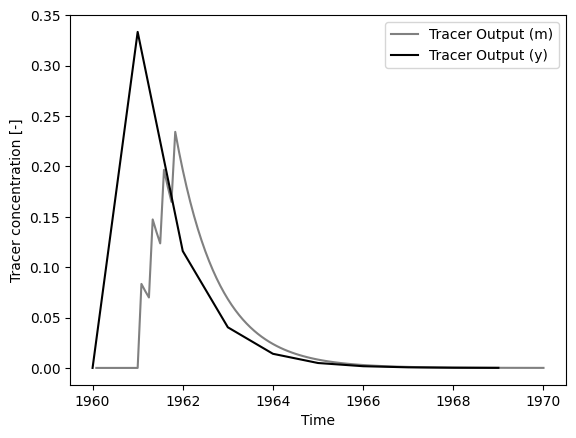

In [22]:
# simulate with both models
sim_m = m_m.simulate()
sim_y = m_y.simulate()

# plot output series
fig, ax = plt.subplots(1, 1)
ax.plot(
    timesteps_m,
    sim_m,
    label="Tracer Output (m)",
    c="grey"
)
ax.plot(
    timesteps_y,
    sim_y,
    label="Tracer Output (y)",
    c="black"
)
ax.set_xlabel("Time")
ax.set_ylabel("Tracer concentration [-]")
ax.legend()
plt.show()